In [21]:
import pandas as pd
diabetes = pd.read_csv(r'C:\Users\hp\Downloads\diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#DATA CLEANING

In [22]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
diabetes[cols_to_norm]= diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [24]:
import tensorflow as tf
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
tricep = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')


In [25]:
num_preg

NumericColumn(key='Pregnancies', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

<AxesSubplot:>

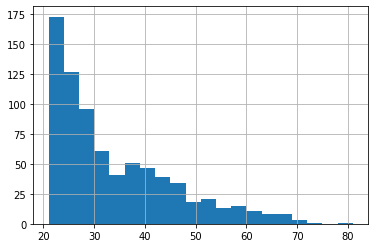

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20)

In [27]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, age_buckets]

In [28]:
x_data = diabetes.drop('Outcome', axis=1)
labels = diabetes['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=101)


In [29]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hp\\AppData\\Local\\Temp\\tmpemviys68', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\hp\AppData\Local\Temp\tmpemviys68\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 218.972
INFO:tensorflow:loss = 0.3354172, step = 100 (0.459 sec)
INFO:tensorflow:global_step/sec: 516.84
INFO:tensorflow:loss = 0.4442262, step = 200 (0.194 sec)
INFO:tensorflow:global_step/sec: 479.754
INFO:tensorflow:loss = 0.5511359, step = 300 (0.207 sec)
INFO:tensorflow:global_step/sec: 550.919
INFO:tensorflow:loss = 0.556548, step = 400 (0.181 sec)
INFO:tensorflow:global_step/sec: 517.149
INFO:tensorflow:loss = 0.7183569, step = 500 (0.193 sec)
INFO:tensorflow:

# Prediction

In [30]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x = X_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

predictions = model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmpemviys68\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.23430836], dtype=float32),
  'logistic': array([0.55831057], dtype=float32),
  'probabilities': array([0.4416894, 0.5583105], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.7073617], dtype=float32),
  'logistic': array([0.6698179], dtype=float32),
  'probabilities': array([0.33018208, 0.6698179 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.18415463], dtype=float32),
  'logistic': array([0.454091], dtype=float32),
  'probabilities': array([0.545909, 0.454091], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logi

In [31]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.


C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-17T04:31:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmpemviys68\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.27305s
INFO:tensorflow:Finished evaluation at 2022-09-17-04:31:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71653545, accuracy_baseline = 0.6574803, auc = 0.7873219, auc_precision_recall = 0.63870347, average_loss = 0.53775185, global_step = 1000, label/mean = 0.34251967, loss = 0.54374206, precision = 0.58426964, prediction/mean = 0.39680836, recall = 0.59770113
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\hp\AppData\Local\Temp\tmpemviys68\model.ckpt-1000


{'accuracy': 0.71653545,
 'accuracy_baseline': 0.6574803,
 'auc': 0.7873219,
 'auc_precision_recall': 0.63870347,
 'average_loss': 0.53775185,
 'label/mean': 0.34251967,
 'loss': 0.54374206,
 'precision': 0.58426964,
 'prediction/mean': 0.39680836,
 'recall': 0.59770113,
 'global_step': 1000}